In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive
%cd MyDrive
%cd 'Data Science Group Project - Big Data Course'

c1 = pd.read_csv('completed_matches.csv').drop('Unnamed: 0', axis=1).convert_dtypes() # completed_matches
u1 = pd.read_csv('upcoming_matches.csv').drop('Unnamed: 0', axis=1).convert_dtypes() # upcoming matches
p1 = pd.read_csv('players.csv').drop('Unnamed: 0', axis=1).convert_dtypes() # players

print(c1.shape)
print(p1.shape)
print(u1.shape)

c = c1.copy()
u = u1.copy()
p = p1.copy()


Mounted at /content/drive
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Data Science Group Project - Big Data Course
(6891, 78)
(2334, 22)
(60, 24)


In [ ]:
def clean_c(df):

  print('Data cleaning. Starting shape:', df.shape)

  # Counting nan values in all fields
  print('Fill NAs with median of dimension')
  print([(x, y) for x, y in zip(df.isna().sum(), df.isna().sum().index) if x > 0])
  # Fill NAs with the median value of each column
  median_values = df.select_dtypes(include=['int64', 'float64']).median()
  df = df.fillna(median_values)
  print(df.shape)

  print('Remove events befor 2013 for relevance')
  df = df.loc[(df.event_year >= 2013)]

  return df


In [ ]:
df = clean_c(c)

Data cleaning. Starting shape: (6891, 78)
Fill NAs with median of dimension
[(12, 'height_diff'), (9, 'weight_diff'), (1035, 'reach_diff'), (195, 'age_diff')]
(6891, 78)
Remove events befor 2013 for relevance


In [ ]:
# Feature creation: win ratio (wins ÷ losses )
p['win_ratio'] = round(p['wins'] / p['losses'], 2)

In [ ]:
def group_into_buckets(series):
    """
    Takes a numeric pandas series and groups values into 10 evenly-sized buckets.
    
    Args:
        series (pandas.Series): A numeric pandas series.
    
    Returns:
        pandas.Series: A new series with values grouped into 10 evenly-sized buckets.
    """
    # Calculate the minimum and maximum values in the series
    min_value = series.min()
    max_value = series.max()
    
    # Calculate the bucket size
    bucket_size = (max_value - min_value) / 10
    
    # Create a list of bucket boundaries
    boundaries = [min_value + i * bucket_size for i in range(11)]
    
    # Use pandas.cut to group the values into buckets
    buckets = pd.cut(series, bins=boundaries, include_lowest=True)
    
    # Return the new series with values grouped into buckets
    return buckets

In [ ]:
# Group the dataframe by the boolean column
grouped = c.groupby('win')

# Define the sample size for each group
sample_size = 500

# Initialize an empty dataframe to store the samples
samples = pd.DataFrame()

# Loop over each group
for group_name, group_data in grouped:
    # If the group has enough rows, sample the required number of rows
    if len(group_data) >= sample_size:
        group_sample = group_data.sample(sample_size)
    # If the group has fewer rows than the required sample size, sample all rows
    else:
        group_sample = group_data.sample(len(group_data))
    # Append the group sample to the overall samples dataframe
    samples = samples.append(group_sample)

# Reset the index of the samples dataframe
samples = samples.reset_index(drop=True)

<ipython-input-67-757c8b469b7d>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples = samples.append(group_sample)
<ipython-input-67-757c8b469b7d>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples = samples.append(group_sample)


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name

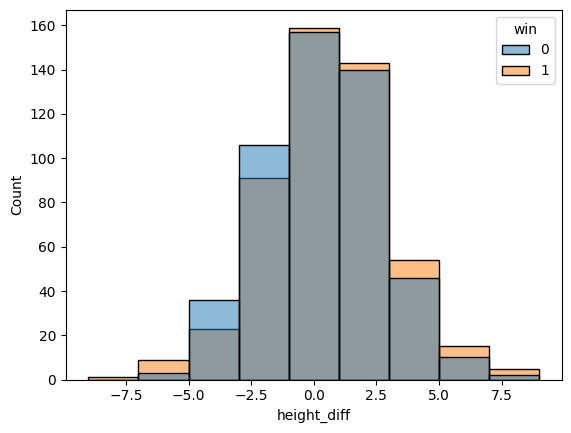

In [ ]:
df = samples[['height_diff', 'win']]

sns.histplot(df, x='height_diff', hue='win', binwidth=2)
plt.show()